<a href="https://colab.research.google.com/github/riccardofea-2006/basketball-analytics-portfolio/blob/main/Curry_westbrook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
print("ambiente pronto per l'analisi")

ambiente pronto per l'analisi


In [2]:
# Installiamo la libreria per scaricare i dati NBA
!pip install nba_api

import matplotlib.pyplot as plt
import pandas as pd
from nba_api.stats.static import players
from nba_api.stats.endpoints import shotchartdetail

print("Librerie installate e pronte!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.0/319.0 kB 4.8 MB/s eta 0:00:00
Librerie installate e pronte!


In [3]:
# 1. Troviamo l'ID di Steph Curry (o di chi vuoi tu)
player_id = 201939  # Questo è il codice fiscale NBA di Curry

# 2. Chiediamo al server NBA i dati di tiro
# ContextMeasure='FGA' significa "Field Goal Attempts" (Tiri tentati)
shot_data = shotchartdetail.ShotChartDetail(
    team_id=0,
    player_id=player_id,
    context_measure_simple='FGA',
    season_nullable='2023-24'
)

# 3. Trasformiamo i dati in una tabella leggibile (DataFrame)
df = shot_data.get_data_frames()[0]

# 4. Vediamo le prime 5 righe per capire cosa abbiamo scaricato
print(df[['PLAYER_NAME', 'LOC_X', 'LOC_Y', 'SHOT_TYPE', 'EVENT_TYPE']].head())

     PLAYER_NAME  LOC_X  LOC_Y       SHOT_TYPE   EVENT_TYPE
0  Stephen Curry   -188    153  3PT Field Goal  Missed Shot
1  Stephen Curry    145    243  3PT Field Goal    Made Shot
2  Stephen Curry     50    272  3PT Field Goal    Made Shot
3  Stephen Curry    -45      0  2PT Field Goal  Missed Shot
4  Stephen Curry    230     83  3PT Field Goal    Made Shot


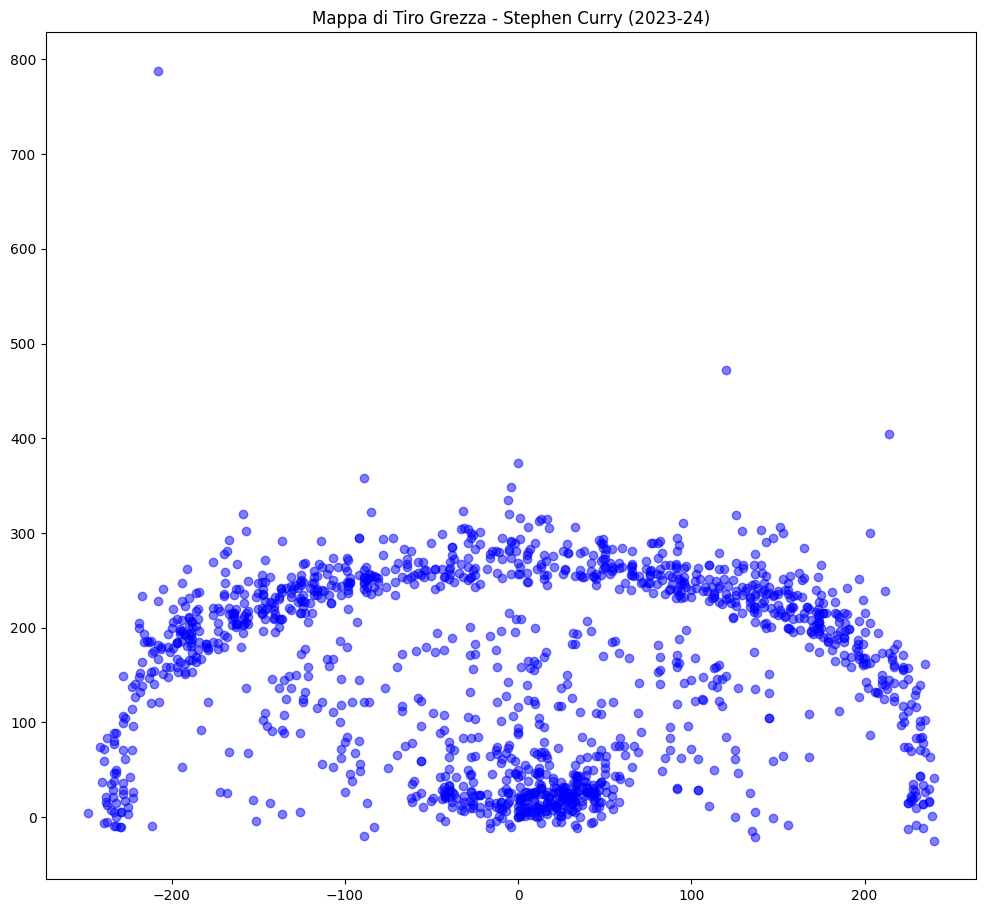

In [4]:
# Creiamo il grafico
plt.figure(figsize=(12, 11))

# Scatter plot: LOC_X sull'asse orizzontale, LOC_Y su quello verticale
# c='blue' è il colore, alpha=0.5 rende i punti semitrasparenti
plt.scatter(df['LOC_X'], df['LOC_Y'], c='blue', alpha=0.5)

plt.title('Mappa di Tiro Grezza - Stephen Curry (2023-24)')
plt.show()

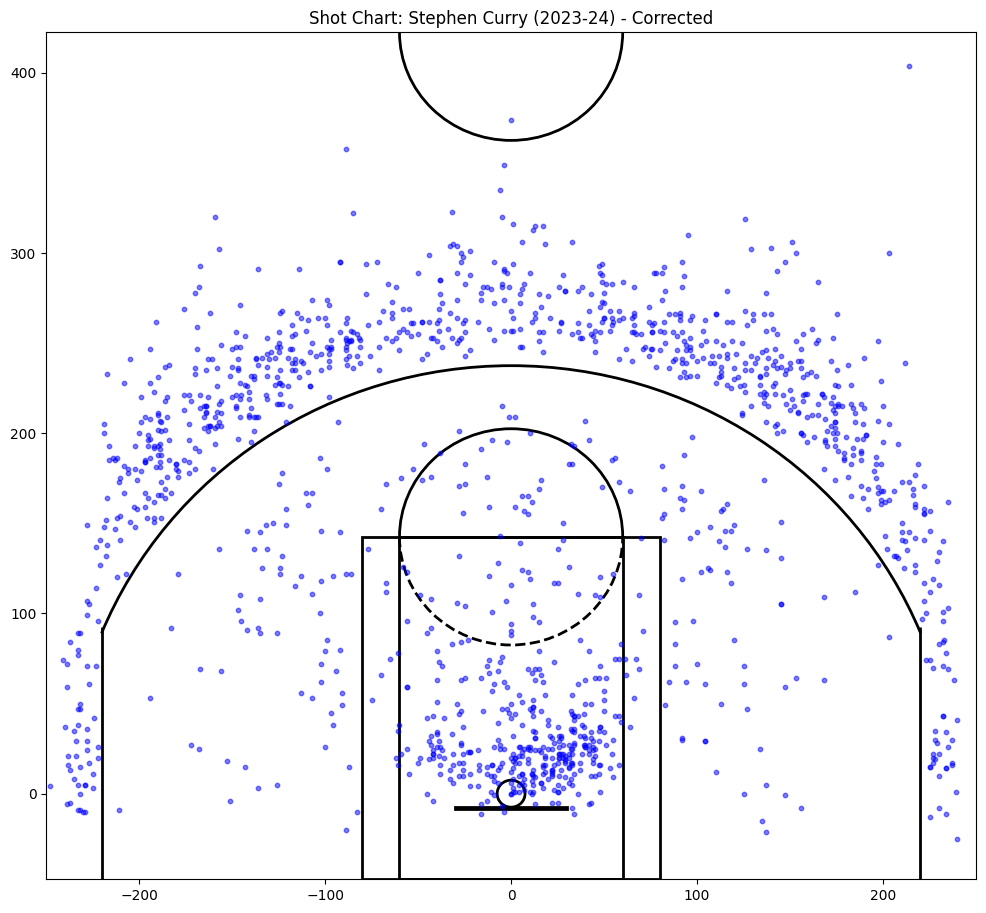

In [5]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2):
    # Questa funzione disegna le linee del campo NBA
    if ax is None:
        ax = plt.gca()

    # Canestro (Cerchio)
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Tabellone
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # L'area (The Paint) - Rettangoli esterni e interni
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color, fill=False)
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color, fill=False)

    # Arco dei tiri liberi
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180, linewidth=lw, color=color, fill=False)
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color, linestyle='dashed')

    # Linea da 3 punti (Corner e Arco)
    # L'NBA ha angoli dritti e poi una curva
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw, color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw, color=color)

    # Linea di metà campo
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color)

    # Aggiungiamo gli elementi al grafico
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, corner_three_a, corner_three_b, three_arc, center_outer_arc]

    for element in court_elements:
        ax.add_patch(element)

    return ax

# --- ORA USIAMO LA FUNZIONE SUI DATI DI CURRY ---

plt.figure(figsize=(12, 11))
draw_court(color="black", lw=2) # Disegniamo il campo

# Disegniamo i tiri
# Nota: xlim e ylim servono a inquadrare solo la metà campo offensiva
plt.scatter(df['LOC_X'], df['LOC_Y'], c='blue', alpha=0.5, s=10) # s=10 è la dimensione del punto

plt.xlim(-250, 250)
plt.ylim(-47.5, 422.5)
plt.title('Shot Chart: Stephen Curry (2023-24) - Corrected')
plt.show()

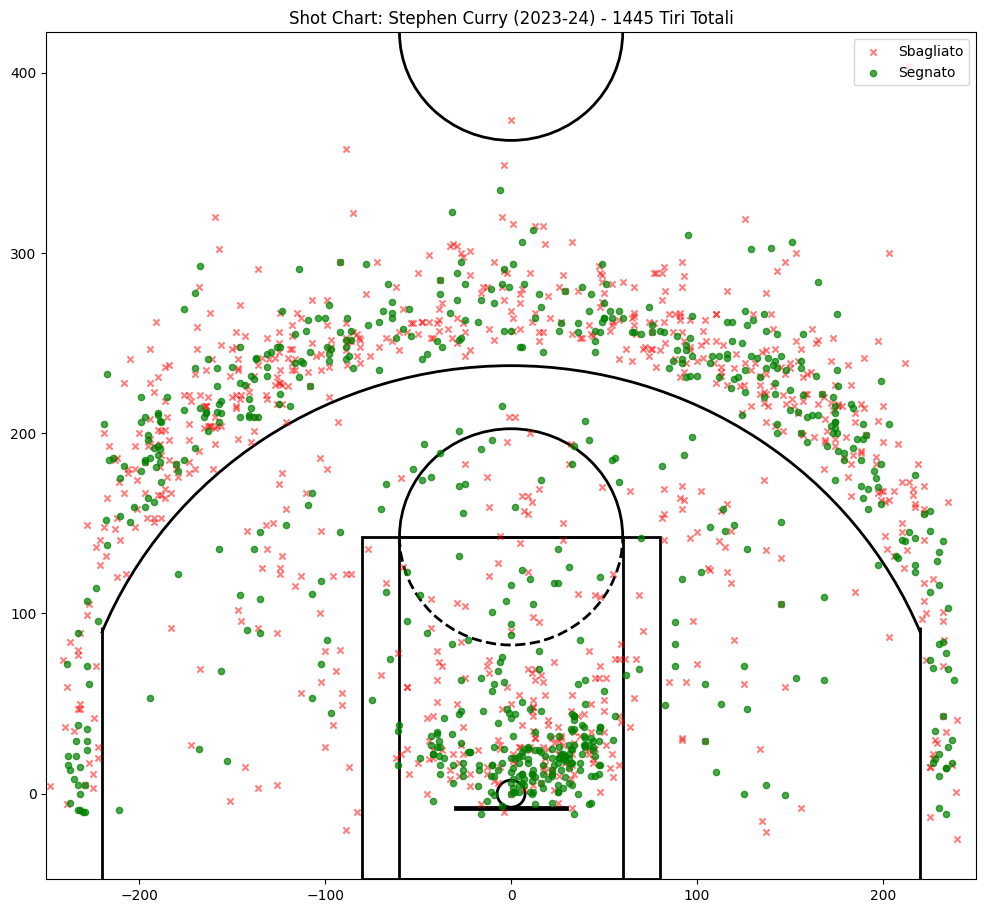

In [6]:
plt.figure(figsize=(12, 11))
draw_court(color="black", lw=2)

# 1. Creiamo due gruppi di dati: Segnati e Sbagliati
# SHOT_MADE_FLAG è 1 se segnato, 0 se sbagliato
made_shots = df[df['SHOT_MADE_FLAG'] == 1]
missed_shots = df[df['SHOT_MADE_FLAG'] == 0]

# 2. Disegniamo i due gruppi con colori diversi
# Sbagliati (Rosso, croce 'x', un po' trasparenti)
plt.scatter(missed_shots['LOC_X'], missed_shots['LOC_Y'],
            c='red', marker='x', s=20, alpha=0.5, label='Sbagliato')

# Segnati (Verde, cerchio 'o', più visibili)
plt.scatter(made_shots['LOC_X'], made_shots['LOC_Y'],
            c='green', marker='o', s=20, alpha=0.7, label='Segnato')

# Setup finale
plt.xlim(-250, 250)
plt.ylim(-47.5, 422.5)
plt.title(f'Shot Chart: Stephen Curry (2023-24) - {len(df)} Tiri Totali')
plt.legend(loc='upper right') # Aggiunge la legenda
plt.show()

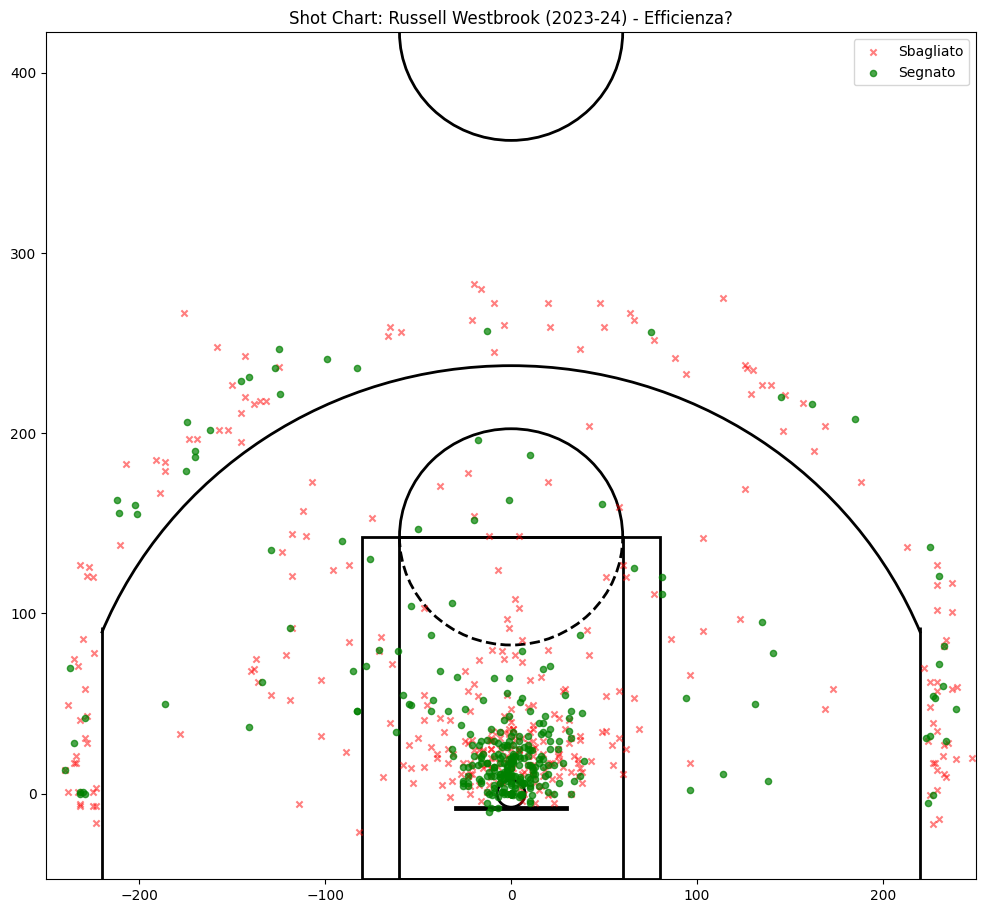

In [7]:
# --- ANALISI RUSSELL WESTBROOK ---

# 1. Impostiamo il NUOVO ID (Westbrook)
player_id = 201566

# 2. Scarichiamo i dati di Westbrook dal server
shot_data_rw = shotchartdetail.ShotChartDetail(
    team_id=0,
    player_id=player_id,
    context_measure_simple='FGA',
    season_nullable='2023-24' # Usiamo l'ultima stagione completa
)

df_rw = shot_data_rw.get_data_frames()[0]

# 3. Disegniamo il grafico
plt.figure(figsize=(12, 11))
draw_court(color="black", lw=2)

# Dividiamo Segnati vs Sbagliati
made_rw = df_rw[df_rw['SHOT_MADE_FLAG'] == 1]
missed_rw = df_rw[df_rw['SHOT_MADE_FLAG'] == 0]

# Disegniamo i punti (Nota le croci rosse!)
plt.scatter(missed_rw['LOC_X'], missed_rw['LOC_Y'],
            c='red', marker='x', s=20, alpha=0.5, label='Sbagliato')
plt.scatter(made_rw['LOC_X'], made_rw['LOC_Y'],
            c='green', marker='o', s=20, alpha=0.7, label='Segnato')

plt.xlim(-250, 250)
plt.ylim(-47.5, 422.5)
plt.title('Shot Chart: Russell Westbrook (2023-24) - Efficienza?')
plt.legend(loc='upper right')
plt.show()